# Creation of article data usaging py-madaclim

## Raster layers metadata with MadaclimLayers class from py_madaclim.info module

Create Madaclim info for labels

In [2]:
from py_madaclim.info import MadaclimLayers

mada_info = MadaclimLayers()

create categ_layers

create bioclim labels

In [3]:
#mada_info.all_layers
#mada_info.categorical_layers

all_labels = mada_info.get_layers_labels() 
env_layers = mada_info.get_layers_labels(layers_subset="env")
bioclim_labels = [label for label in mada_info.get_layers_labels(as_descriptive_labels=True) if "bio" in label]

categ_layers = mada_info.get_categorical_combinations(as_descriptive_keys=True)
print(f"There are {len(categ_layers)} categorical layers in the Madaclim db:\n")
for layer in categ_layers:
    print(layer)

There are 4 categorical layers in the Madaclim db:

env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)
env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
env_77_veg_Vegetation types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25)
env_78_wat_Watersheds (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)


In [4]:
import os
from pathlib import Path

cwd = Path(os.getcwd())  

print([file.name for file in cwd.iterdir() if file.suffix == ".tif"])

mada_info.clim_raster = "./madaclim_current.tif"
mada_info.env_raster = "./madaclim_enviro.tif"

['madaclim_current.tif', 'madaclim_enviro.tif']


In [5]:
from py_madaclim.raster_manipulation import MadaclimRasters

mada_rasters = MadaclimRasters(clim_raster=cwd / "madaclim_current.tif", env_raster=cwd / "madaclim_enviro.tif")


In [6]:
categ_layers = mada_info.get_categorical_combinations()

Instantiate a `MadaclimCollection` from a '.csv' or a 'dataframe'

In [13]:
from py_madaclim.raster_manipulation import MadaclimCollection
coll = MadaclimCollection()
coll = MadaclimCollection.populate_from_csv("../../data/gbif_points.csv")

Warning! No source_crs column in the csv. Using the default value of EPSG:4326...
Creating MadaclimPoint(specimen_id=spe1_duba...)
Creating MadaclimPoint(specimen_id=spe1_auga...)
Creating MadaclimPoint(specimen_id=spe1_moge...)
Creating MadaclimPoint(specimen_id=spe2_auga...)
Creating MadaclimPoint(specimen_id=spe2_duba...)
Creating MadaclimPoint(specimen_id=spe3_duba...)
Creating MadaclimPoint(specimen_id=spe2_moge...)
Creating MadaclimPoint(specimen_id=spe1_abba...)
Creating MadaclimPoint(specimen_id=spe2_abba...)
Creating MadaclimPoint(specimen_id=spe3_moge...)
Creating MadaclimPoint(specimen_id=spe3_abba...)
Creating MadaclimPoint(specimen_id=spe4_abba...)
Creating MadaclimPoint(specimen_id=spe5_abba...)
Creating MadaclimPoint(specimen_id=spe4_duba...)
Creating MadaclimPoint(specimen_id=spe5_duba...)
Creating MadaclimPoint(specimen_id=spe6_duba...)
Creating MadaclimPoint(specimen_id=spe7_duba...)
Creating MadaclimPoint(specimen_id=spe4_moge...)
Creating MadaclimPoint(specimen_id=s

In [14]:
import pandas as pd

df = pd.read_csv("../../data/gbif_points.csv")
df

,specimen_id,latitude,longitude,genus,species
0,spe1_duba,-12.479722,49.213056,Coffea,dubardii
1,spe1_auga,-12.479722,49.213056,Coffea,augagneurii
2,spe1_moge,-12.524444,49.166389,Coffea,mogenetii
3,spe2_auga,-12.479722,49.213056,Coffea,augagneurii
4,spe2_duba,-12.900000,49.083333,Coffea,dubardii
...,...,...,...,...,...
184,spe65_moge,-12.530000,49.180000,Coffea,mogenetii
185,spe66_moge,-12.530000,49.180000,Coffea,mogenetii
186,spe76_duba,-13.180000,49.700000,Coffea,dubardii
187,spe77_duba,-13.180000,49.700000,Coffea,dubardii


In [70]:
coll.all_points

[MadaclimPoint(
 	specimen_id = spe1_duba,
 	source_crs = 4326,
 	longitude = 49.213056,
 	latitude = -12.479722,
 	mada_geom_point = POINT (958179.453843839 8616753.698071461),
 	sampled_layers = None (Not sampled yet),
 	nodata_layers = None (Not sampled yet),
 	is_categorical_encoded = False,
 	genus = Coffea,
 	species = dubardii,
 	gdf.shape = (1, 10)
 ),
 MadaclimPoint(
 	specimen_id = spe1_auga,
 	source_crs = 4326,
 	longitude = 49.213056,
 	latitude = -12.479722,
 	mada_geom_point = POINT (958179.453843839 8616753.698071461),
 	sampled_layers = None (Not sampled yet),
 	nodata_layers = None (Not sampled yet),
 	is_categorical_encoded = False,
 	genus = Coffea,
 	species = augagneurii,
 	gdf.shape = (1, 10)
 ),
 MadaclimPoint(
 	specimen_id = spe1_moge,
 	source_crs = 4326,
 	longitude = 49.166389,
 	latitude = -12.524444,
 	mada_geom_point = POINT (953017.9118287204 8611876.766817348),
 	sampled_layers = None (Not sampled yet),
 	nodata_layers = None (Not sampled yet),
 	is_ca

In [15]:
coll.gdf

,specimen_id,source_crs,longitude,latitude,mada_geom_point,sampled_layers,nodata_layers,is_categorical_encoded,genus,species
0,spe1_duba,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),None,None,False,Coffea,dubardii
1,spe1_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),None,None,False,Coffea,augagneurii
2,spe1_moge,4326,49.166389,-12.524444,POINT (953017.912 8611876.767),None,None,False,Coffea,mogenetii
3,spe2_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),None,None,False,Coffea,augagneurii
4,spe2_duba,4326,49.083333,-12.900000,POINT (943319.055 8570391.744),None,None,False,Coffea,dubardii
...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),None,None,False,Coffea,mogenetii
185,spe66_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),None,None,False,Coffea,mogenetii
186,spe76_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),None,None,False,Coffea,dubardii
187,spe77_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),None,None,False,Coffea,dubardii


In [ ]:
coll.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster,
    layers_to_sample="all",
    layer_info=True
)

In [73]:
print(f"Updated Attributes:\n{coll}\n")

print(f"State of {coll.all_points[2].specimen_id} specimen:\n{coll.all_points[2]}")

Updated Attributes:
MadaclimCollection = [
	MadaclimPoint(specimen_id=spe1_duba, lat=-12.479722, lon=49.213056, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe1_auga, lat=-12.479722, lon=49.213056, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe1_moge, lat=-12.524444, lon=49.166389, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe2_auga, lat=-12.479722, lon=49.213056, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe2_duba, lat=-12.900000, lon=49.083333, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe3_duba, lat=-12.459167, lon=49.256111, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe2_moge, lat=-12.524444, lon=49.166389, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe1_abba, lat=-21.383333, lon=47.866667, sampled_layers=True, categ_encoded=False),
	MadaclimPoint(specimen_id=spe2_abba, lat=-24.760833, lon=46.

In [74]:
# From the collection's objects
print(list(coll.sampled_layers.keys()))
for specimen_id in coll.sampled_layers:
    print(f"\nSampled layer values for {specimen_id}")
    for layer, value in coll.sampled_layers[specimen_id].items():
        if layer in bioclim_labels[0]:    #print only first bioclim layer
            print(f"{layer} => {value}") 

['spe1_duba', 'spe1_auga', 'spe1_moge', 'spe2_auga', 'spe2_duba', 'spe3_duba', 'spe2_moge', 'spe1_abba', 'spe2_abba', 'spe3_moge', 'spe3_abba', 'spe4_abba', 'spe5_abba', 'spe4_duba', 'spe5_duba', 'spe6_duba', 'spe7_duba', 'spe4_moge', 'spe1_micr', 'spe2_micr', 'spe8_duba', 'spe9_duba', 'spe6_abba', 'spe10_duba', 'spe11_duba', 'spe5_moge', 'spe6_moge', 'spe12_duba', 'spe7_abba', 'spe7_moge', 'spe8_moge', 'spe3_micr', 'spe9_moge', 'spe10_moge', 'spe13_duba', 'spe14_duba', 'spe15_duba', 'spe11_moge', 'spe16_duba', 'spe12_moge', 'spe17_duba', 'spe18_duba', 'spe13_moge', 'spe19_duba', 'spe14_moge', 'spe15_moge', 'spe16_moge', 'spe20_duba', 'spe21_duba', 'spe22_duba', 'spe23_duba', 'spe17_moge', 'spe4_micr', 'spe5_micr', 'spe8_abba', 'spe9_abba', 'spe18_moge', 'spe19_moge', 'spe20_moge', 'spe24_duba', 'spe25_duba', 'spe21_moge', 'spe10_abba', 'spe11_abba', 'spe26_duba', 'spe6_micr', 'spe12_abba', 'spe27_duba', 'spe22_moge', 'spe28_duba', 'spe29_duba', 'spe30_duba', 'spe31_duba', 'spe7_micr',

In [88]:
# Or from the geodataframe attribute
#coll.gdf[["specimen_id"] + bioclim_labels[:2]]

In [17]:
coll.gdf

,specimen_id,source_crs,longitude,latitude,mada_geom_point,sampled_layers,nodata_layers,is_categorical_encoded,genus,species,...,clim_70_ndm_Number of dry months in the year (months.year-1),env_71_alt_Altitude (meters),env_72_slo_Slope (degrees),env_73_asp_Aspect; clockwise from North (degrees),"env_74_solrad_Solar radiation; computed from altitude, slope and aspect (Wh.m-2.day-1)","env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)","env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)","env_77_veg_Vegetation types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25)","env_78_wat_Watersheds (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)",env_79_forcov_Percentage of forest cover in 1 km by 1 km grid cells (%)
0,spe1_duba,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,False,Coffea,dubardii,...,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,7.0,1.0,34.0
1,spe1_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,False,Coffea,augagneurii,...,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,7.0,1.0,34.0
2,spe1_moge,4326,49.166389,-12.524444,POINT (953017.912 8611876.767),79,0,False,Coffea,mogenetii,...,7.0,1079.0,13.0,58.0,8192.0,9.0,8.0,14.0,12.0,100.0
3,spe2_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,False,Coffea,augagneurii,...,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,7.0,1.0,34.0
4,spe2_duba,4326,49.083333,-12.900000,POINT (943319.055 8570391.744),79,0,False,Coffea,dubardii,...,8.0,165.0,28.0,358.0,7892.0,7.0,22.0,5.0,13.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),79,0,False,Coffea,mogenetii,...,7.0,1095.0,4.0,10.0,8252.0,9.0,8.0,14.0,12.0,100.0
185,spe66_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),79,0,False,Coffea,mogenetii,...,7.0,1095.0,4.0,10.0,8252.0,9.0,8.0,14.0,12.0,100.0
186,spe76_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),79,0,False,Coffea,dubardii,...,8.0,171.0,8.0,36.0,7888.0,10.0,9.0,6.0,1.0,24.0
187,spe77_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),79,0,False,Coffea,dubardii,...,8.0,171.0,8.0,36.0,7888.0,10.0,9.0,6.0,1.0,24.0


In [23]:
categ_layers = mada_info.get_categorical_combinations(as_descriptive_keys=False)


In [22]:
categ_layers
#coll.gdf[["specimen_id"] + list(categ_layers.keys())]

{'env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)': {1: 'Alluvial_&_Lake_deposits',
  2: 'Unconsolidated_Sands',
  4: 'Mangrove_Swamp',
  5: 'Tertiary_Limestones_+_Marls_&_Chalks',
  6: 'Sandstones',
  7: 'Mesozoic_Limestones_+_Marls_(inc._"Tsingy")',
  9: 'Lavas_(including_Basalts_&_Gabbros)',
  10: 'Basement_Rocks_(Ign_&_Met)',
  11: 'Ultrabasics',
  12: 'Quartzites',
  13: 'Marble_(Cipolin)'},
 'env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)': {1: 'Bare_Rocks',
  2: 'Raw_Lithic_Mineral_Soils',
  3: 'Poorly_Evolved_Erosion_Soils,_Lithosols',
  4: 'Wind-deposited_Soils',
  5: 'Alluvio-colluvial_Deposited_Soils',
  6: 'Salty_Deposited_Soils',
  7: 'Fluvio-marine_Deposited_Soils_-_Mangroves',
  8: 'Vertisols',
  9: 'Andosols',
  10: 'Podzolic_Soils_and_Podzols',
  11: 'Hydromorphic_Soils',
  12: 'Red_Fersiallitic_Soils',
  13: 'Yellow_Fersiallitic_Soils',
  14: 'Yellow-red_Ferruginous_Soils_(R

In [26]:
#coll.binary_encode_categorical()
coll.all_points

[MadaclimPoint(
 	specimen_id = spe1_duba,
 	source_crs = 4326,
 	longitude = 49.213056,
 	latitude = -12.479722,
 	mada_geom_point = POINT (958179.453843839 8616753.698071461),
 	len(sampled_layers) = 79 layer(s),
 	len(nodata_layers) = None (0 layers),
 	is_categorical_encoded = False,
 	genus = Coffea,
 	species = dubardii,
 	gdf.shape = (1, 89)
 ),
 MadaclimPoint(
 	specimen_id = spe1_auga,
 	source_crs = 4326,
 	longitude = 49.213056,
 	latitude = -12.479722,
 	mada_geom_point = POINT (958179.453843839 8616753.698071461),
 	len(sampled_layers) = 79 layer(s),
 	len(nodata_layers) = None (0 layers),
 	is_categorical_encoded = False,
 	genus = Coffea,
 	species = augagneurii,
 	gdf.shape = (1, 89)
 ),
 MadaclimPoint(
 	specimen_id = spe1_moge,
 	source_crs = 4326,
 	longitude = 49.166389,
 	latitude = -12.524444,
 	mada_geom_point = POINT (953017.9118287204 8611876.766817348),
 	len(sampled_layers) = 79 layer(s),
 	len(nodata_layers) = None (0 layers),
 	is_categorical_encoded = Fals

In [24]:
#{k:v for k,v in list(coll.encoded_categ_layers["spe1_abba"].items())[:12]}

TypeError: 'NoneType' object is not subscriptable

In [27]:
#coll.gdf[["specimen_id"] + coll.encoded_categ_labels].iloc[:, :13]
coll.gdf

,specimen_id,source_crs,longitude,latitude,mada_geom_point,sampled_layers,nodata_layers,is_categorical_encoded,genus,species,...,clim_70_ndm_Number of dry months in the year (months.year-1),env_71_alt_Altitude (meters),env_72_slo_Slope (degrees),env_73_asp_Aspect; clockwise from North (degrees),"env_74_solrad_Solar radiation; computed from altitude, slope and aspect (Wh.m-2.day-1)","env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)","env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)","env_77_veg_Vegetation types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25)","env_78_wat_Watersheds (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)",env_79_forcov_Percentage of forest cover in 1 km by 1 km grid cells (%)
0,spe1_duba,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,False,Coffea,dubardii,...,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,7.0,1.0,34.0
1,spe1_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,False,Coffea,augagneurii,...,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,7.0,1.0,34.0
2,spe1_moge,4326,49.166389,-12.524444,POINT (953017.912 8611876.767),79,0,False,Coffea,mogenetii,...,7.0,1079.0,13.0,58.0,8192.0,9.0,8.0,14.0,12.0,100.0
3,spe2_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,False,Coffea,augagneurii,...,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,7.0,1.0,34.0
4,spe2_duba,4326,49.083333,-12.900000,POINT (943319.055 8570391.744),79,0,False,Coffea,dubardii,...,8.0,165.0,28.0,358.0,7892.0,7.0,22.0,5.0,13.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),79,0,False,Coffea,mogenetii,...,7.0,1095.0,4.0,10.0,8252.0,9.0,8.0,14.0,12.0,100.0
185,spe66_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),79,0,False,Coffea,mogenetii,...,7.0,1095.0,4.0,10.0,8252.0,9.0,8.0,14.0,12.0,100.0
186,spe76_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),79,0,False,Coffea,dubardii,...,8.0,171.0,8.0,36.0,7888.0,10.0,9.0,6.0,1.0,24.0
187,spe77_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),79,0,False,Coffea,dubardii,...,8.0,171.0,8.0,36.0,7888.0,10.0,9.0,6.0,1.0,24.0


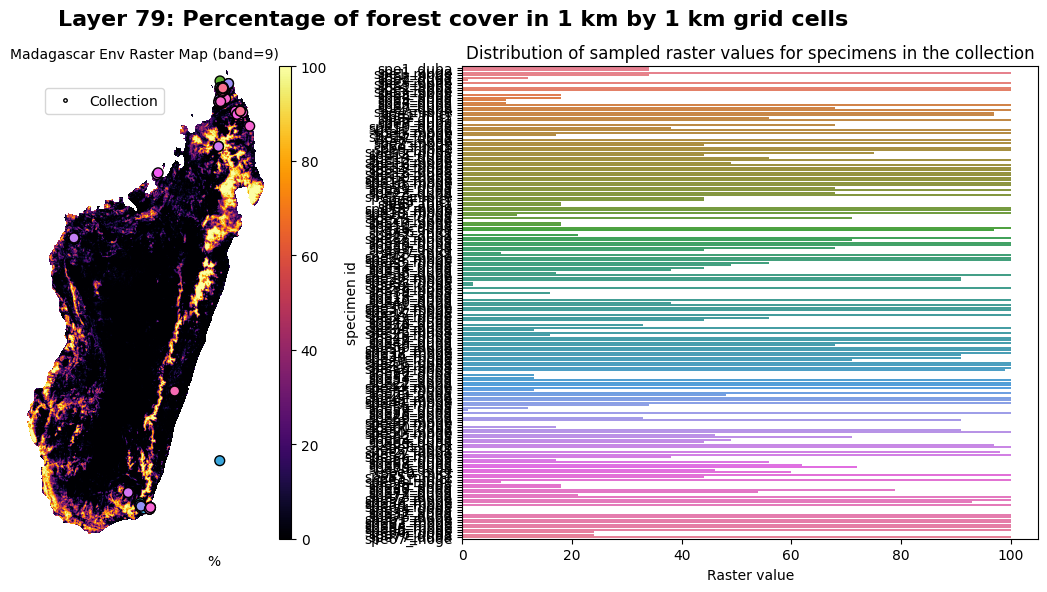

In [95]:
coll.plot_on_layer(layer="layer_79")

In [28]:
coll.gdf.to_csv("project_input_nonbin.csv", index=False)

In [97]:
coll.gdf

,specimen_id,source_crs,longitude,latitude,mada_geom_point,sampled_layers,nodata_layers,is_categorical_encoded,genus,species,...,env_78_wat_Watersheds_RetDisp_Mahavavy,env_78_wat_Watersheds_RetDisp_Manampatrana,env_78_wat_Watersheds_RetDisp_Mananara_du_Sud,env_78_wat_Watersheds_RetDisp_Mandrare,env_78_wat_Watersheds_RetDisp_Mangoky,env_78_wat_Watersheds_RetDisp_Mangoro,env_78_wat_Watersheds_RetDisp_Onilahy,env_78_wat_Watersheds_RetDisp_Sambirano,env_78_wat_Watersheds_RetDisp_Tsiribihina,env_78_wat_Watersheds__nodata
0,spe1_duba,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,True,Coffea,dubardii,...,0,0,0,0,0,0,0,0,0,0
1,spe1_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,True,Coffea,augagneurii,...,0,0,0,0,0,0,0,0,0,0
2,spe1_moge,4326,49.166389,-12.524444,POINT (953017.912 8611876.767),79,0,True,Coffea,mogenetii,...,0,0,0,0,0,0,0,0,0,0
3,spe2_auga,4326,49.213056,-12.479722,POINT (958179.454 8616753.698),79,0,True,Coffea,augagneurii,...,0,0,0,0,0,0,0,0,0,0
4,spe2_duba,4326,49.083333,-12.900000,POINT (943319.055 8570391.744),79,0,True,Coffea,dubardii,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),79,0,True,Coffea,mogenetii,...,0,0,0,0,0,0,0,0,0,0
185,spe66_moge,4326,49.180000,-12.530000,POINT (954490.488 8611237.422),79,0,True,Coffea,mogenetii,...,0,0,0,0,0,0,0,0,0,0
186,spe76_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),79,0,True,Coffea,dubardii,...,0,0,0,0,0,0,0,0,0,0
187,spe77_duba,4326,49.700000,-13.180000,POINT (1009820.547 8538182.940),79,0,True,Coffea,dubardii,...,0,0,0,0,0,0,0,0,0,0


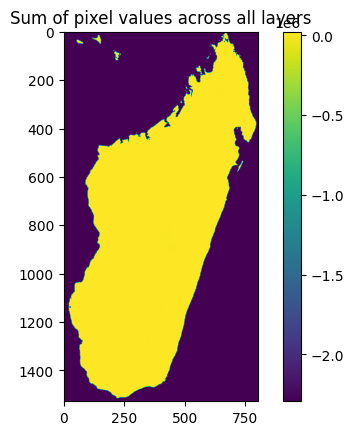

In [30]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the raster file
with rasterio.open("madaclim_current.tif") as src:
    # Read all layers (bands) from the raster
    layers = src.read()

    # Compute the sum of pixel values across all layers for each pixel location
    sum_all_layers = np.sum(layers, axis=0)

    # Plot the sum of layers
    plt.imshow(sum_all_layers, cmap='viridis')
    plt.colorbar()
    plt.title('Sum of pixel values across all layers')
    plt.show()


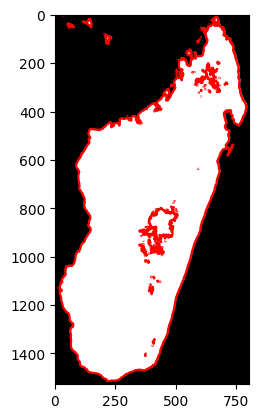

In [35]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the raster file
with rasterio.open('madaclim_current.tif') as src:
    # Read the specific layer (band) from the raster
    layer = src.read(1)

    # Define the minimum threshold
    min_threshold = 100  # Adjust this threshold value as needed

    # Create a contour plot with the minimum threshold
    plt.contour(layer, levels=[min_threshold], colors='r')

    # Display the layer
    show(layer, cmap='gray')
    plt.show()
